In [8]:
using Korg, CSV, DataFrames
using Pkg
Pkg.add("Pandas")
using Pandas

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Pandas ─────────── v1.6.1
   Installed Lazy ───────────── v0.15.1
   Installed TableTraitsUtils ─ v1.0.2
   Installed DataValues ─────── v0.4.13
    Updating `~/.julia/environments/v1.11/Project.toml`
  [eadc2687] + Pandas v1.6.1
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [e7dc6d0d] + DataValues v0.4.13
  [50d2b5c4] + Lazy v0.15.1
  [eadc2687] + Pandas v1.6.1
  [382cd787] + TableTraitsUtils v1.0.2
Precompiling project...
    732.6 ms  ✓ DataValues
   1324.6 ms  ✓ Lazy
    543.2 ms  ✓ TableTraitsUtils
   1915.2 ms  ✓ Pandas
  4 dependencies successfully precompiled in 4 seconds. 182 already precompiled.
[ Info: Installing pandas via the Conda pandas package...
[ Info: Running `conda install -y pandas` in root environment


Retrieving notices: done
Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda





## Package Plan ##

  environment location: /Users/maryumsayeed/.julia/conda/3/aarch64

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.7.14  |       hbd8a1cb_0         152 KB  conda-forge
    certifi-2025.7.14          |     pyhd8ed1ab_0         156 KB  conda-forge
    openssl-3.5.1              |       h81ee809_0         2.9 MB  conda-forge
    pandas-2.3.1               |  py312h98f7732_0        13.3 MB  conda-forge
    python-tzdata-2025.2       |     pyhd8ed1ab_0         141 KB  conda-forge
    pytz-2025.2                |     pyhd8ed1ab_0         185 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.9 MB

The following NEW packages will be INSTALLED:

  pandas             conda-forge/osx-arm64::pandas-2.3.1-py312h98f7732_0 
  pytho

In [17]:
galah_linelist = Korg.get_GALAH_DR3_linelist();

In [4]:
typeof(galah_linelist)

Vector{Line{Float64, Float64, Float64, Float64, Float64, Float64}} (alias for Array{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}, 1})

In [18]:
linetable = DataFrame(galah_linelist)
CSV.write("galah_linelist.csv", linetable)

"galah_linelist.csv"

In [12]:
# linelist is in vacuum
linelist = Korg.Line.(Korg.air_to_vacuum.(linetable.wl),
                      linetable.log_gf,
                      linetable.species,
                      linetable.E_lower,
                      linetable.gamma_rad, 
                      linetable.gamma_stark, 
                      linetable.vdW)

307000-element Vector{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}}:
 OTi 4677.61953 Å (log gf = -0.91, χ = 0.32 eV)
 OTi 4677.624414 Å (log gf = -1.17, χ = 0.3 eV)
 OTi 4677.625391 Å (log gf = -1.01, χ = 0.59 eV)
 HSi 4677.627833 Å (log gf = -3.21, χ = 1.49 eV)
 Rh I 4677.639555 Å (log gf = -1.78, χ = 0.71 eV)
 Ni I 4677.640043 Å (log gf = -3.36, χ = 3.46 eV)
 OTi 4677.643462 Å (log gf = -0.91, χ = 0.34 eV)
 OTi 4677.645416 Å (log gf = -1.24, χ = 0.26 eV)
 OZr 4677.648835 Å (log gf = 0.37, χ = 0.35 eV)
 OTi 4677.650788 Å (log gf = -0.13, χ = 1.19 eV)
 C2 4677.651765 Å (log gf = -2.43, χ = 0.65 eV)
 OTi 4677.656649 Å (log gf = -1.17, χ = 0.28 eV)
 OTi 4677.656649 Å (log gf = 0.31, χ = 0.47 eV)
 ⋮
 OTi 7929.271028 Å (log gf = -0.32, χ = 0.83 eV)
 OTi 7929.276889 Å (log gf = -0.01, χ = 0.87 eV)
 HFe 7929.28275 Å (log gf = -1.4, χ = 0.3 eV)
 OTi 7929.293983 Å (log gf = -1.34, χ = 0.65 eV)
 OTi 7929.301798 Å (log gf = 0.09, χ = 0.73 eV)
 OTi 7929.309612 Å (log gf = -0.82

In [16]:
typeof(linelist)

Vector{Line{Float64, Float64, Float64, Float64, Float64, Float64}} (alias for Array{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}, 1})

In [15]:

CSV.write("galah_linelist_2.csv", DataFrame(linelist))

"galah_linelist_2.csv"

In [6]:
# Filter rows where "species" contains "Cu" (case-insensitive)
element_Cu = filter(line -> occursin(r"(?i)Cu", string(line.species)), galah_linelist)

# check that Li lines are in vacuum:
element_Li = filter(line -> occursin(r"(?i)Li", string(line.species)), galah_linelist)



4-element Vector{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}}:
 Li I 6709.615234 Å (log gf = -0.04, χ = 0.0 eV)
 Li I 6709.766602 Å (log gf = -0.34, χ = 0.0 eV)
 Li I 6709.773438 Å (log gf = -1.12, χ = 0.0 eV)
 Li I 6709.924316 Å (log gf = -1.42, χ = 0.0 eV)

In [7]:
df_Cu = DataFrame(element_Cu)
#println(df_Cu)

Row,wl,log_gf,species,E_lower,gamma_rad,gamma_stark,vdW
,Float64,Float64,Species,Float64,Float64,Float64,Tuple…
1,4.69878e-5,-0.658,Cu I,5.245,1.31826e8,3.38844e-6,"(2.57039e-8, -1.0)"
2,4.70292e-5,-1.247,Cu I,5.688,1.8197e8,3.63078e-6,"(2.69153e-8, -1.0)"
3,4.70591e-5,-0.529,Cu I,5.102,1.34896e8,3.38844e-6,"(2.57039e-8, -1.0)"
4,4.76875e-5,-0.33,Cu I,5.725,2.23872e8,3.63078e-6,"(2.69153e-8, -1.0)"
5,4.77746e-5,-1.597,Cu I,5.421,6.0256e7,3.38844e-6,"(2.81838e-8, -1.0)"
6,4.79179e-5,-1.697,Cu I,7.206,8.70963e8,5.12861e-5,"(5.12861e-8, -1.0)"
7,4.79528e-5,-0.382,Cu I,5.506,1.12202e8,3.38844e-6,"(2.63027e-8, -1.0)"
8,4.79837e-5,-1.803,Cu I,5.153,1.34896e8,3.38844e-6,"(2.57039e-8, -1.0)"
9,4.8412e-5,-2.364,Cu I,6.792,4.67735e8,3.89045e-5,"(4.67735e-8, -1.0)"


In [22]:
using PyPlot;
using DelimitedFiles;

In [49]:
a = readdlm("../files/normalized_spectra_txt/113_20.txt");
wave, flux, ferr = a[:, 1], a[:, 2], a[ :, 3];

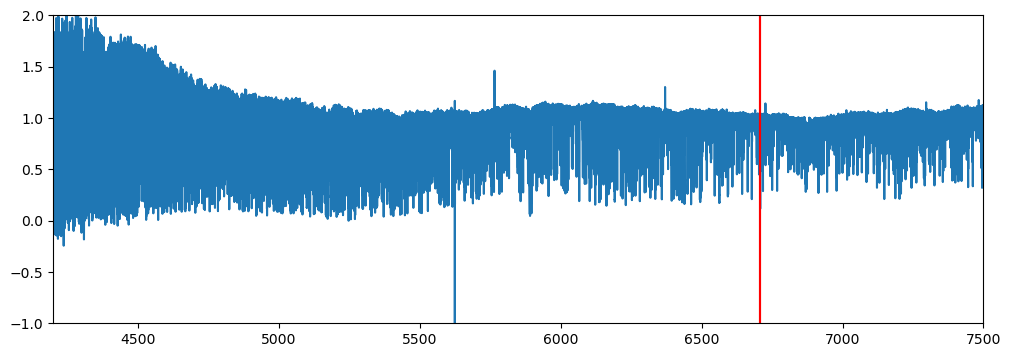

PyObject <matplotlib.lines.Line2D object at 0x280c65f40>

In [50]:
PyPlot.figure(figsize = (12, 4))
PyPlot.plot(wave, flux,)
PyPlot.xlim(4200,7500)
PyPlot.ylim(-1.,2)
PyPlot.axvline(6707.775,color="red")
PyPlot.axvline(6707.926,color="red")

In [51]:
#waveobs = select(df_Cu, [:wl])

mask = findall(x -> 4200 < x < 7550, wave)

waveobs = wave[mask];
fluxobs = flux[mask];
errobs  = ferr[mask]
println(size(wave),size(waveobs))

(438657,)(351706,)


In [52]:
# parse the observed spectrum
spec = (
    air_wavelength = waveobs, 
    flux = fluxobs, 
    waveobs = Korg.air_to_vacuum.(waveobs), 
    errobs = errobs  
);

In [55]:
initial_guess = (;Teff=4723., logg=2.4, m_H=-0.1, vmic=5)

@time fit_result = Korg.Fit.fit_spectrum(vec(spec.waveobs), vec(spec.flux), vec(spec.errobs), linelist, initial_guess;  R=140000);



LoadError: InterruptException:

In [56]:
PyPlot.plot(waveobs, fluxobs, color = "green", label = "Original Spectrum", alpha = 0.7);
PyPlot.plot(waveobs, fit_result.best_fit_flux, color = "k", label = "Fit Spectrum", alpha = 0.7)
PyPlot.xlabel("Wavelength, (\\lambda\\) [Å]")
PyPlot.ylabel("Flux [erg/cm²/s/Å]")
PyPlot.legend()
PyPlot.tight_layout()

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/maryumsayeed/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('x and y must have same first dimension, but have shapes (351706,) and (351607,)')
  File "/Users/maryumsayeed/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3827, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/Users/maryumsayeed/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 1777, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/maryumsayeed/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 297, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "/Users/maryumsayeed/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 494, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "


In [39]:
fit_result.best_fit_params

Dict{String, Float64} with 4 entries:
  "Teff" => 4359.83
  "logg" => 3.40898
  "m_H"  => -2.85459
  "vmic" => 124.715

In [ ]:

figure(figsize=(3,3))
plot([t["chi2"] for t in fit_result.trace])
ylabel(L"χ^2")
xlabel("optimizer step")

figure(figsize=(3,3))
plot([t["Teff"] for t in fit_result.trace])
ylabel(L"
 [K]")
xlabel("optimizer step")